In [1]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.4 MB/s eta 0:00:00


In [2]:
!pip install python-dotenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install -U langchain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 5.6 MB/s eta 0:00:00


# Chains in LangChain

## Outline

* LLMChain
* Sequential Chains
  * SimpleSequentialChain
  * SequentialChain
* Router Chain

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

In [ ]:
#!pip install pandas

In [7]:
import pandas as pd

product0 = "Queen Size Sheet Set"
product1 = "Waterproof Phone Pouch"
product2 = "Luxury Air Mattress"
product3 = "Pillows Insert"
product4 = "Milk Frother Handheld\n"
product5 = "L'Or Espresso Café \n"
product6 = "Hervidor de Agua Eléctrico"

review0 = 'I ordered a king size set. My only criticism would be that I wish seller would offer the king size set with 4 pillowcases. I separately ordered a two pack of pillowcases so I could have a total of four. When I saw the two packages, it looked like the color did not exactly match. Customer service was excellent about sending me two more pillowcases so I would have four that matched. Excellent! For the cost of these sheets, I am satisfied with the characteristics and coolness of the sheets.'
review1 = 'I loved the waterproof sac, although the opening was made of a hard plastic. I don’t know if that would break easily. But I couldn’t turn my phone on, once it was in the pouch.'
review2 = "This mattress had a small hole in the top of it (took forever to find where it was), and the patches that they provide did not work, maybe because it's the top of the mattress where it's kind of like fabric and a patch won't stick. Maybe I got unlucky with a defective mattress, but where's quality assurance for this company? That flat out should not happen. Emphasis on flat. Cause that's what the mattress was. Seriously horrible experience, ruined my friend's stay with me. Then they make you ship it back instead of just providing a refund, which is also super annoying to pack up an air mattress and take it to the UPS store. This company is the worst, and this mattress is the worst."
review3 = 'This is the best throw pillow fillers on Amazon. I’ve tried several others, and they’re all cheap and flat no matter how much fluffing you do. Once you toss these in the dryer after you remove them from the vacuum sealed shipping material, they fluff up great'
review4 = "\xa0I loved this product. But they only seem to last a few months. The company was great replacing the first one (the frother falls out of the handle and can't be fixed). The after 4 months my second one did the same. I only use the frother for coffee once a day. It's not overuse or abuse. I'm very disappointed and will look for another. As I understand they will only replace once. Anyway, if you have one good luck."
review5 = "Je trouve le goût médiocre. La mousse ne tient pas, c'est bizarre. J'achète les mêmes dans le commerce et le goût est bien meilleur...\nVieux lot ou contrefaçon !?"
review6 = 'Está lu bonita calienta muy rápido, es muy funcional, solo falta ver cuánto dura, solo llevo 3 días en funcionamiento.'

product_list = [product0, product1, product2, product3, product4, product5, product6]
review_list = [review0, review1, review2, review3, review4, review5, review6]

data = {'Product': product_list, 'Review': review_list}
df = pd.DataFrame(data)
df.to_csv('Data.csv')
df


,Product,Review
0,Queen Size Sheet Set,I ordered a king size set. My only criticism w...
1,Waterproof Phone Pouch,"I loved the waterproof sac, although the openi..."
2,Luxury Air Mattress,This mattress had a small hole in the top of i...
3,Pillows Insert,This is the best throw pillow fillers on Amazo...
4,Milk Frother Handheld\n,I loved this product. But they only seem to l...
5,L'Or Espresso Café \n,Je trouve le goût médiocre. La mousse ne tient...
6,Hervidor de Agua Eléctrico,"Está lu bonita calienta muy rápido, es muy fun..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Product  7 non-null      object
 1   Review   7 non-null      object
dtypes: object(2)
memory usage: 240.0+ bytes


In [11]:
import pandas as pd
df = pd.read_csv('Data.csv')

In [12]:
df.head()

,Unnamed: 0,Product,Review
0,0,Queen Size Sheet Set,I ordered a king size set. My only criticism w...
1,1,Waterproof Phone Pouch,"I loved the waterproof sac, although the openi..."
2,2,Luxury Air Mattress,This mattress had a small hole in the top of i...
3,3,Pillows Insert,This is the best throw pillow fillers on Amazo...
4,4,Milk Frother Handheld\n,I loved this product. But they only seem to l...


## LLMChain

In [13]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

llm = ChatOpenAI(temperature=0.9)
prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}?"
)


chain = LLMChain(llm=llm, prompt=prompt)
product = "Queen Size Sheet Set"
chain.run(product)

'"Royal Bedding Co."'

## SimpleSequentialChain

In [14]:
from langchain.chains import SimpleSequentialChain

llm = ChatOpenAI(temperature=0.9)

# prompt template 1
first_prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}?"
)

# Chain 1
chain_one = LLMChain(llm=llm, prompt=first_prompt)

In [15]:
# prompt template 2
second_prompt = ChatPromptTemplate.from_template(
    "Write a 20 words description for the following \
    company:{company_name}"
)
# chain 2
chain_two = LLMChain(llm=llm, prompt=second_prompt)

In [16]:
overall_simple_chain = SimpleSequentialChain(chains=[chain_one, chain_two],
                                             verbose=True
                                            )
overall_simple_chain.run(product)



> Entering new  chain...
Royal Linens.
Royal Linens is a premium home textile company offering a wide range of high-quality bed linens, duvets, and towels.

> Finished chain.


'Royal Linens is a premium home textile company offering a wide range of high-quality bed linens, duvets, and towels.'

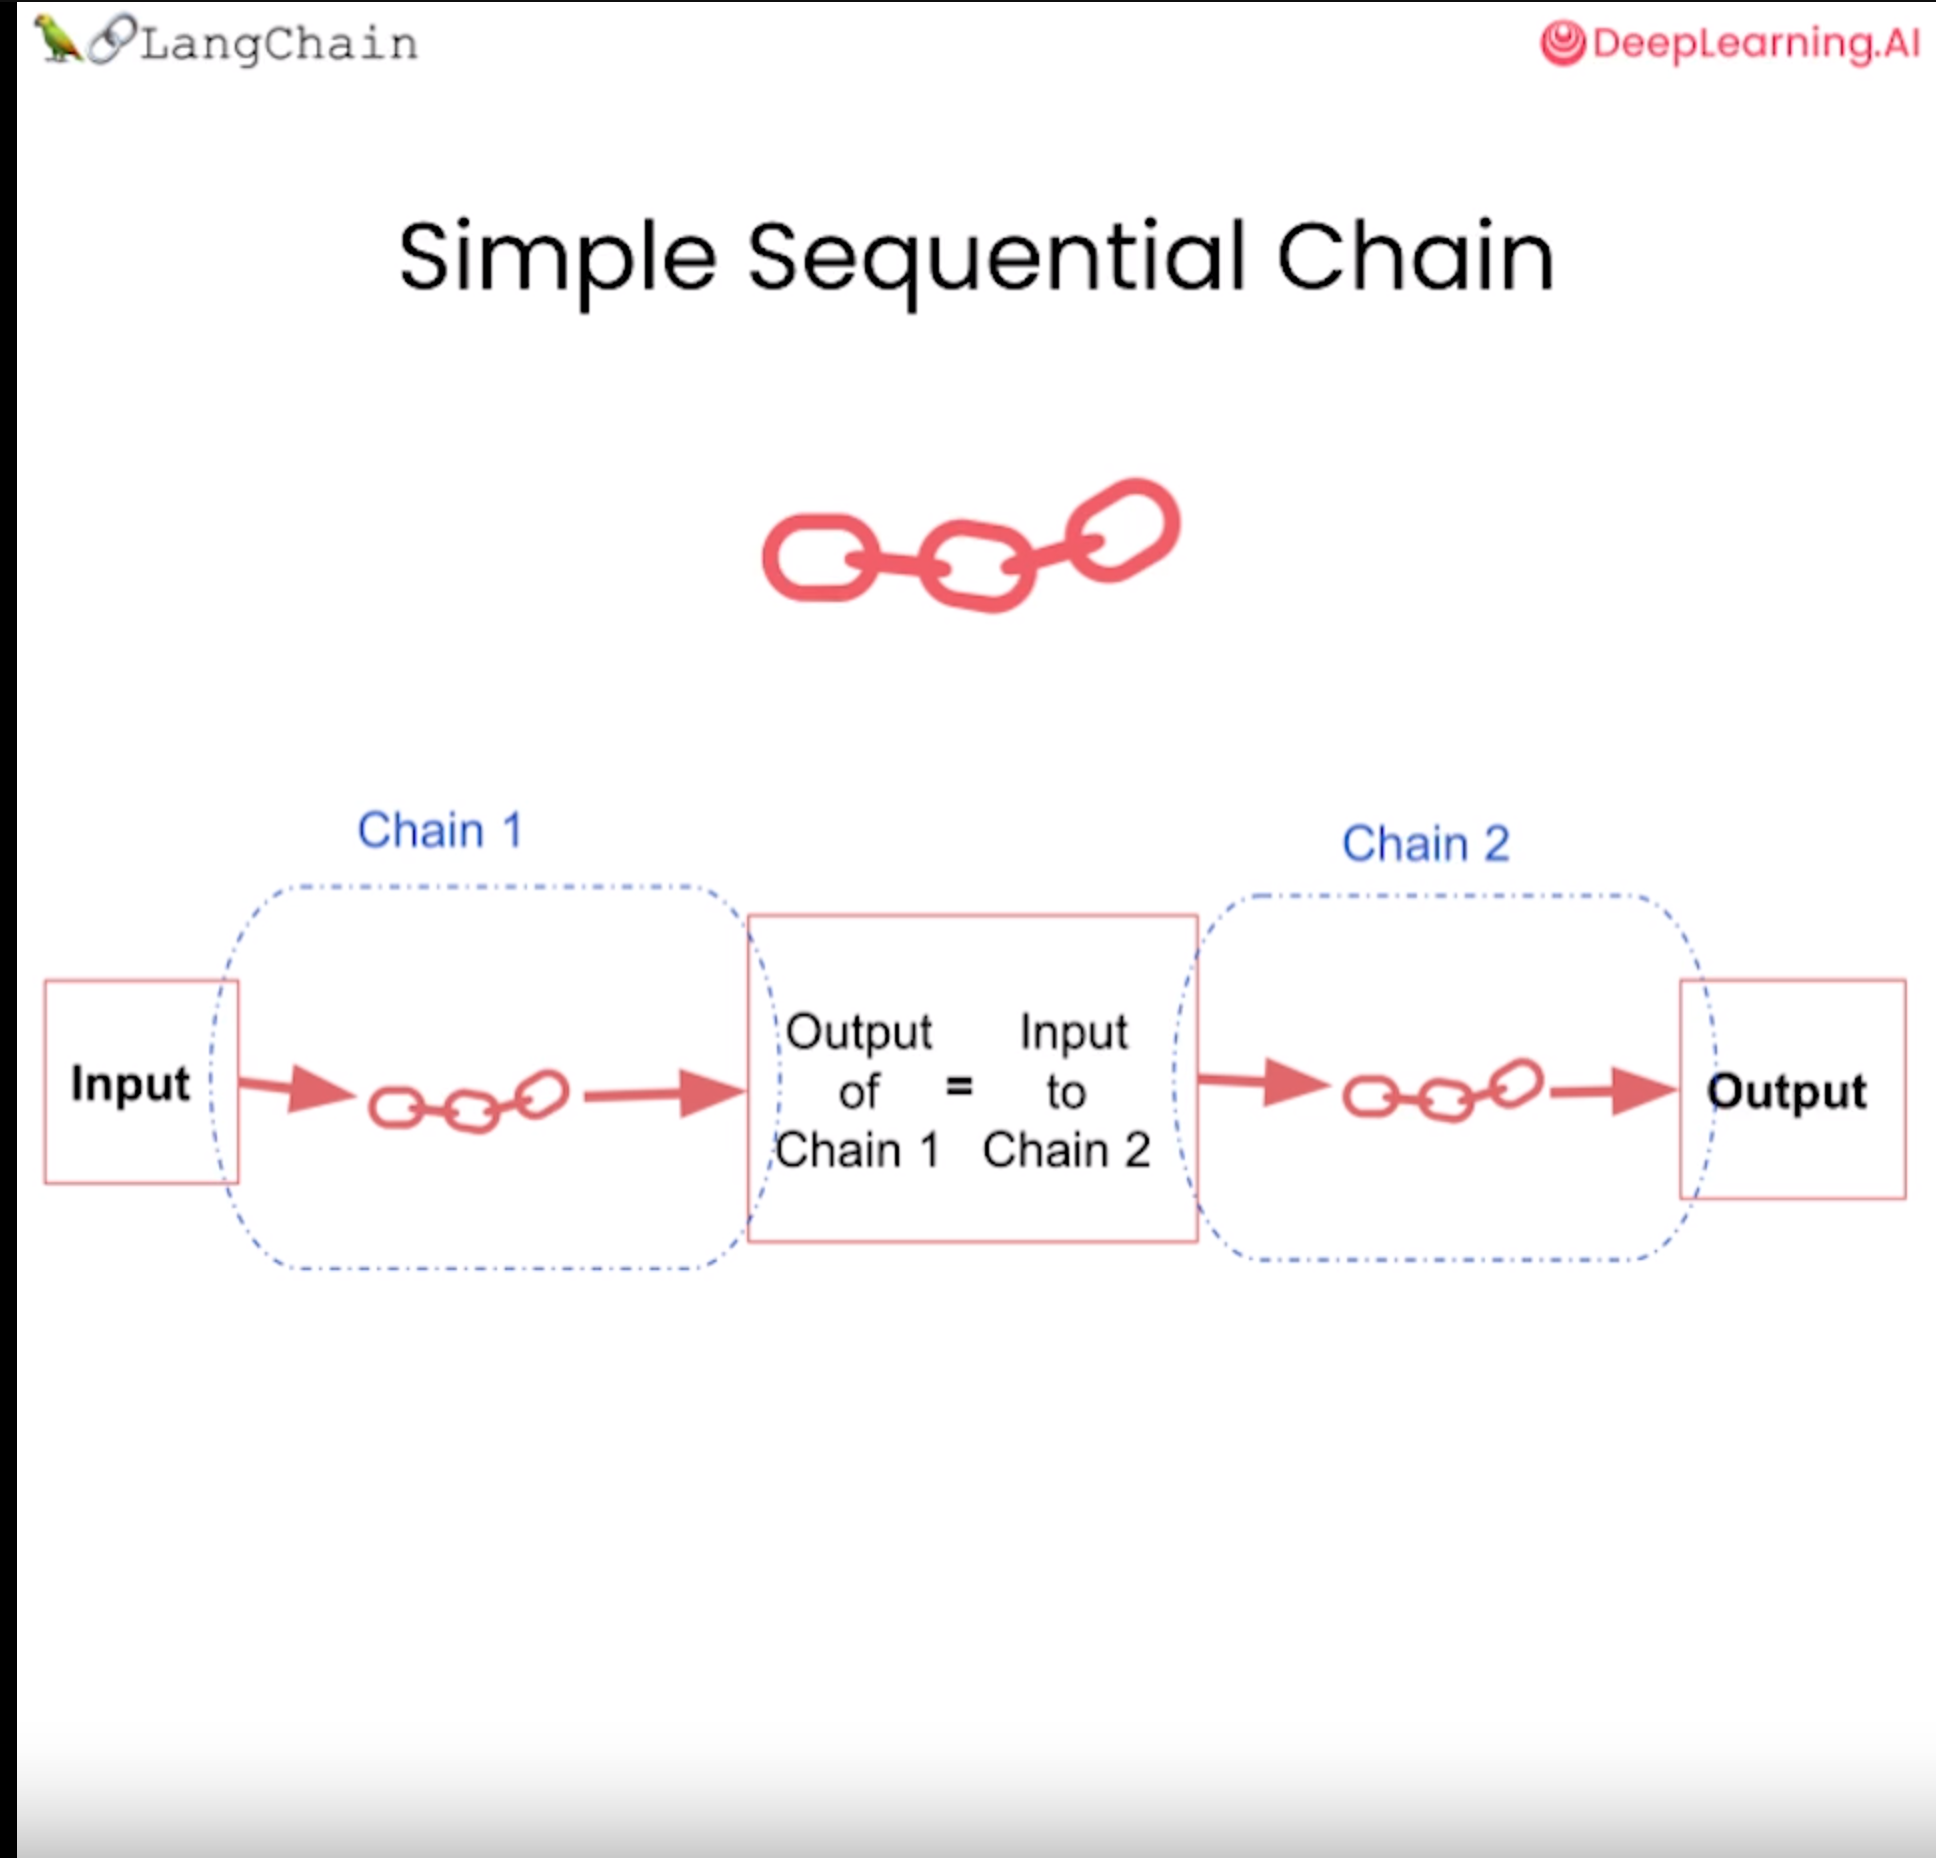

## SequentialChain

In [17]:
from langchain.chains import SequentialChain
llm = ChatOpenAI(temperature=0.9)

# Need to set the output keys in each prompt very carefully
# e.g. "\n\n{Review}" for prompt template 1
# "\n\n{English_Review}" for prompt template 2

In [18]:

# prompt template 1: translate to english
first_prompt = ChatPromptTemplate.from_template(
    "Translate the following review to english:"
    "\n\n{Review}"
)
# chain 1: input= Review and output= English_Review
chain_one = LLMChain(llm=llm, prompt=first_prompt,
                     output_key="English_Review"
                    )


In [19]:
second_prompt = ChatPromptTemplate.from_template(
    "Can you summarize the following review in 1 sentence:"
    "\n\n{English_Review}"
)
# chain 2: input= English_Review and output= summary
chain_two = LLMChain(llm=llm, prompt=second_prompt,
                     output_key="summary"
                    )


In [20]:
# prompt template 3: translate to english
third_prompt = ChatPromptTemplate.from_template(
    "What language is the following review:\n\n{Review}"
)
# chain 3: input= Review and output= language
chain_three = LLMChain(llm=llm, prompt=third_prompt,
                       output_key="language"
                      )


In [21]:

# prompt template 4: follow up message
fourth_prompt = ChatPromptTemplate.from_template(
    "Write a follow up response to the following "
    "summary in the specified language:"
    "\n\nSummary: {summary}\n\nLanguage: {language}"
)
# chain 4: input= summary, language and output= followup_message
chain_four = LLMChain(llm=llm, prompt=fourth_prompt,
                      output_key="followup_message"
                     )


In [23]:
# overall_chain: input= Review
# and output= English_Review,summary, followup_message
overall_chain = SequentialChain(
    chains=[chain_one, chain_two, chain_three, chain_four],
    input_variables=["Review"],
    output_variables=["English_Review", "summary", "followup_message"],
    verbose=True
)

In [24]:
review = df.Review[5]
overall_chain(review)



> Entering new  chain...

> Finished chain.


{'Review': "Je trouve le goût médiocre. La mousse ne tient pas, c'est bizarre. J'achète les mêmes dans le commerce et le goût est bien meilleur...\nVieux lot ou contrefaçon !?",
 'English_Review': "I find the taste mediocre. The foam doesn't hold, it's weird. I buy the same ones in stores and the taste is much better... Old batch or counterfeit!?",
 'summary': 'The reviewer is disappointed with the taste and foam consistency, and questions whether the product they received was an old or counterfeit batch.',
 'followup_message': "Réponse de suivi:\n\nNous sommes sincèrement désolés d'apprendre que vous n'êtes pas satisfait de la saveur et de la consistance de la mousse de notre produit. Nous prenons ces préoccupations très au sérieux et souhaitons vous assurer que nous prenons toutes les mesures nécessaires pour maintenir la qualité de notre produit. Nous vous invitons à nous contacter directement pour discuter de votre expérience et pour vous aider à déterminer si le produit que vous a

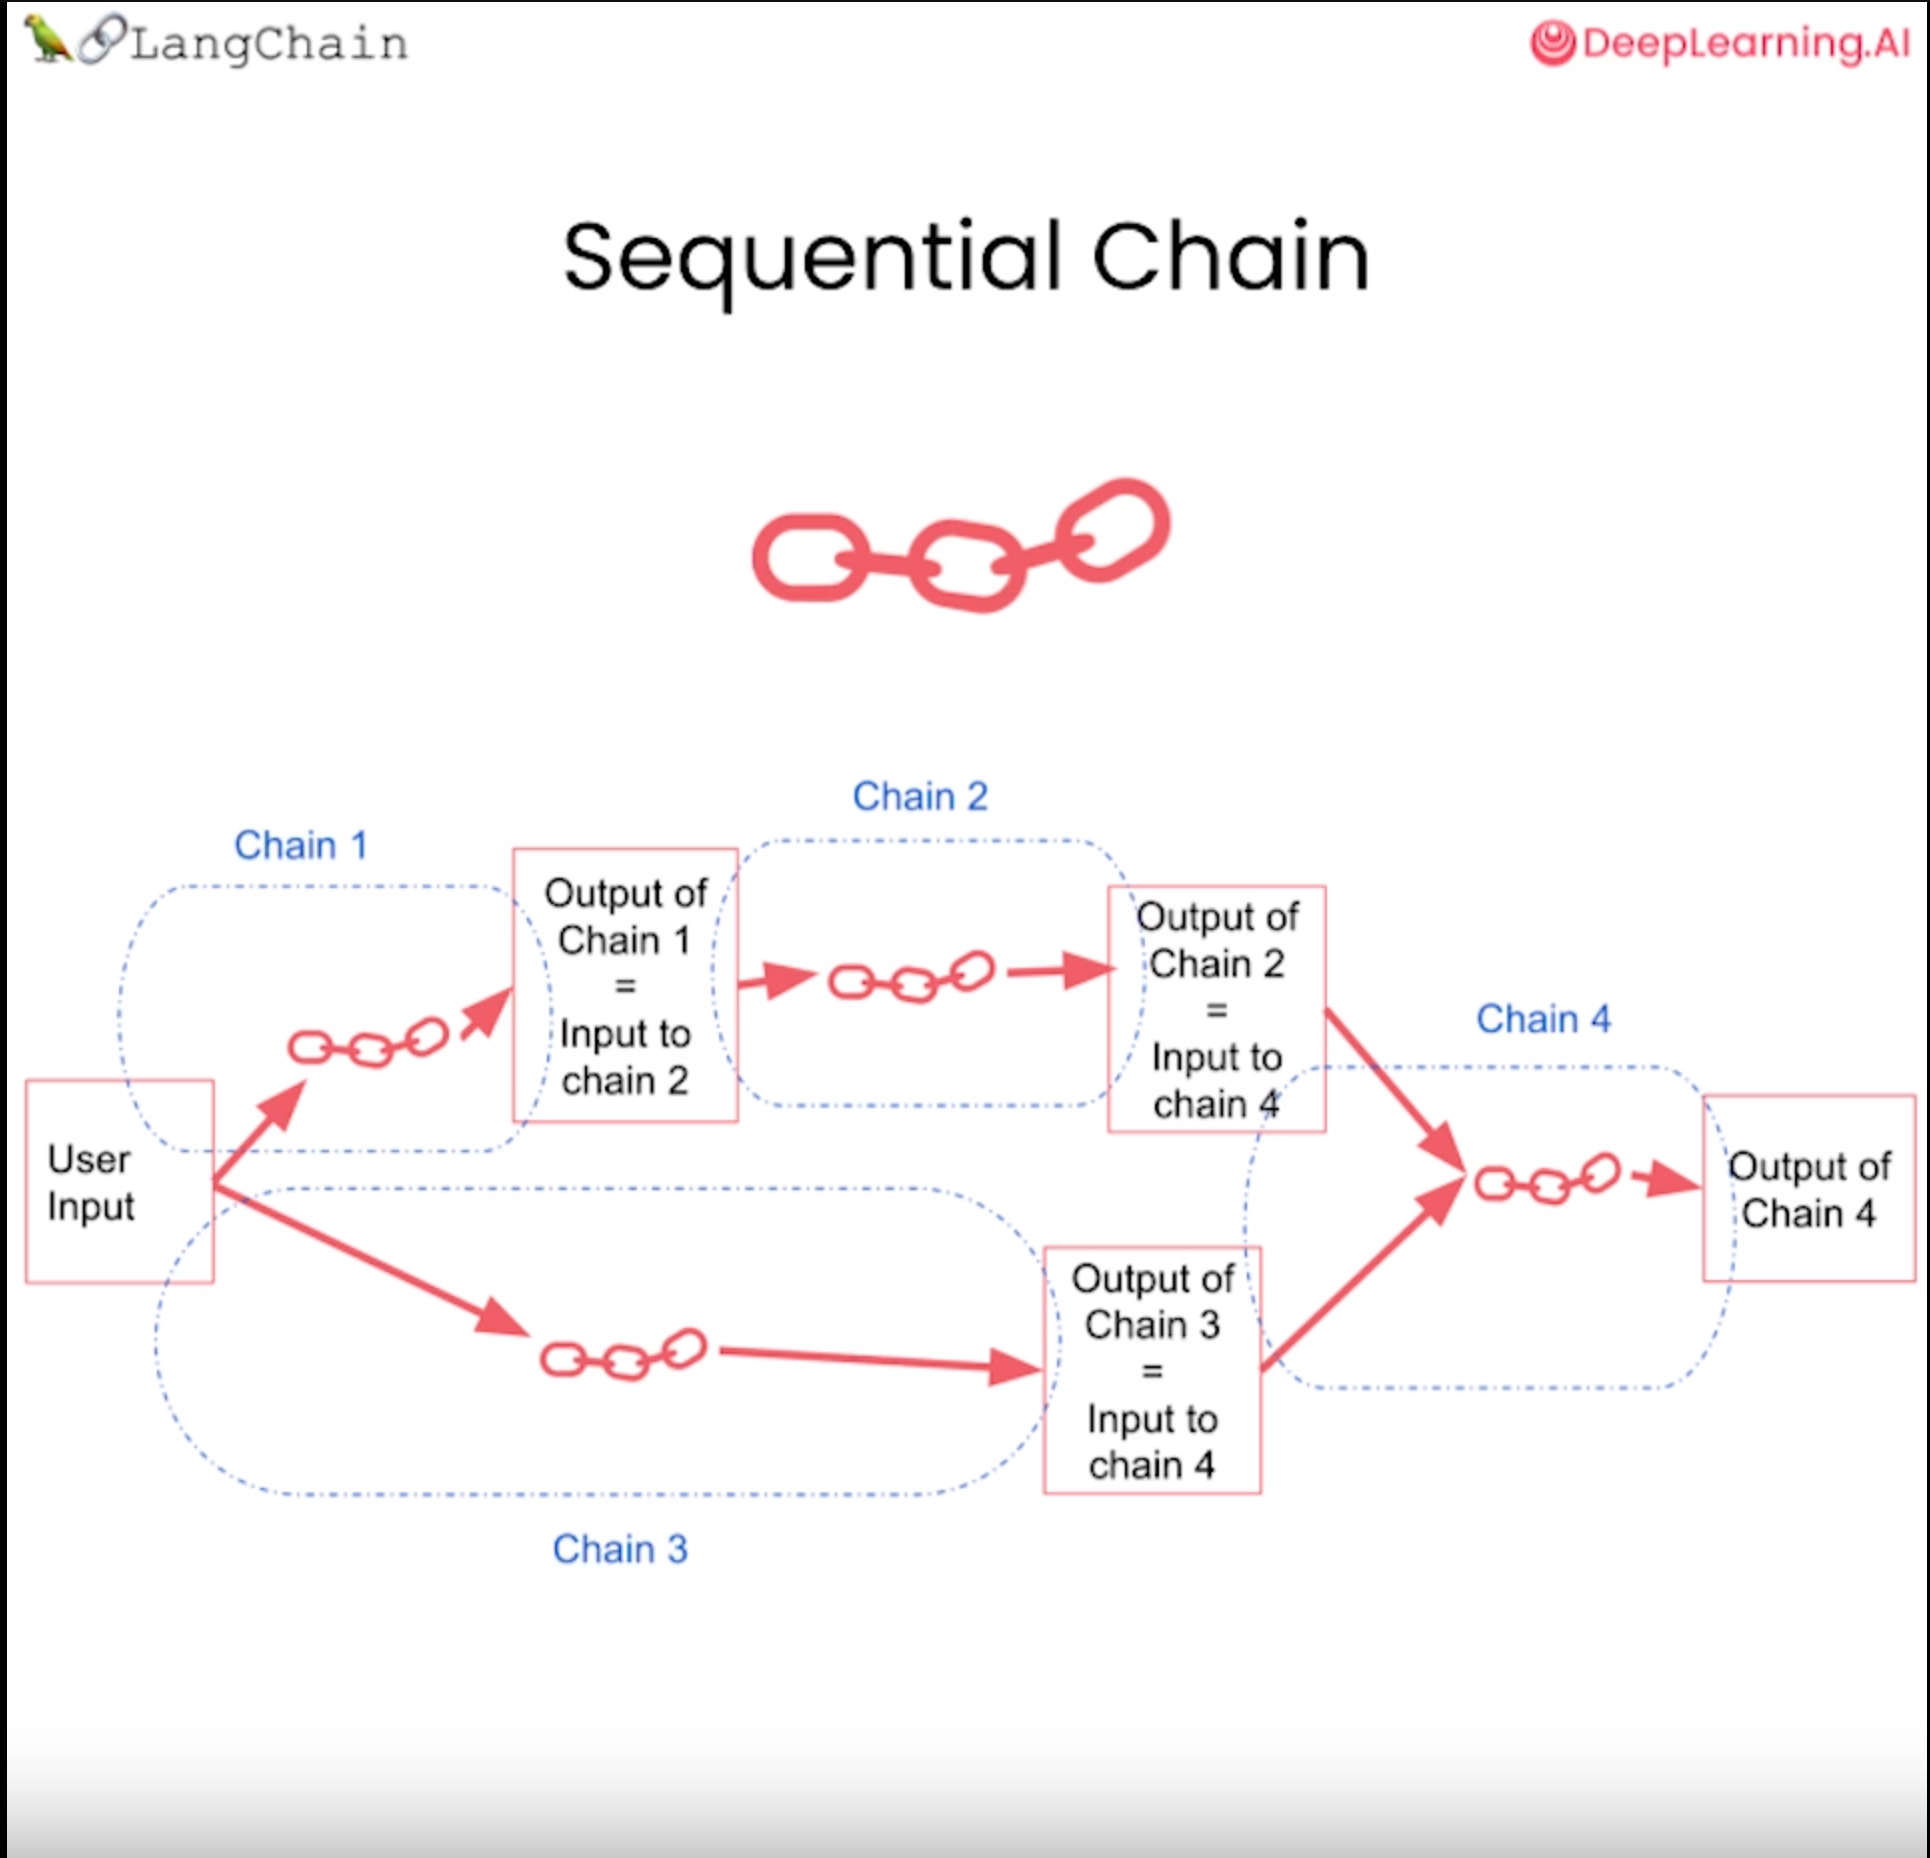

## Router Chain

- for customised subchains

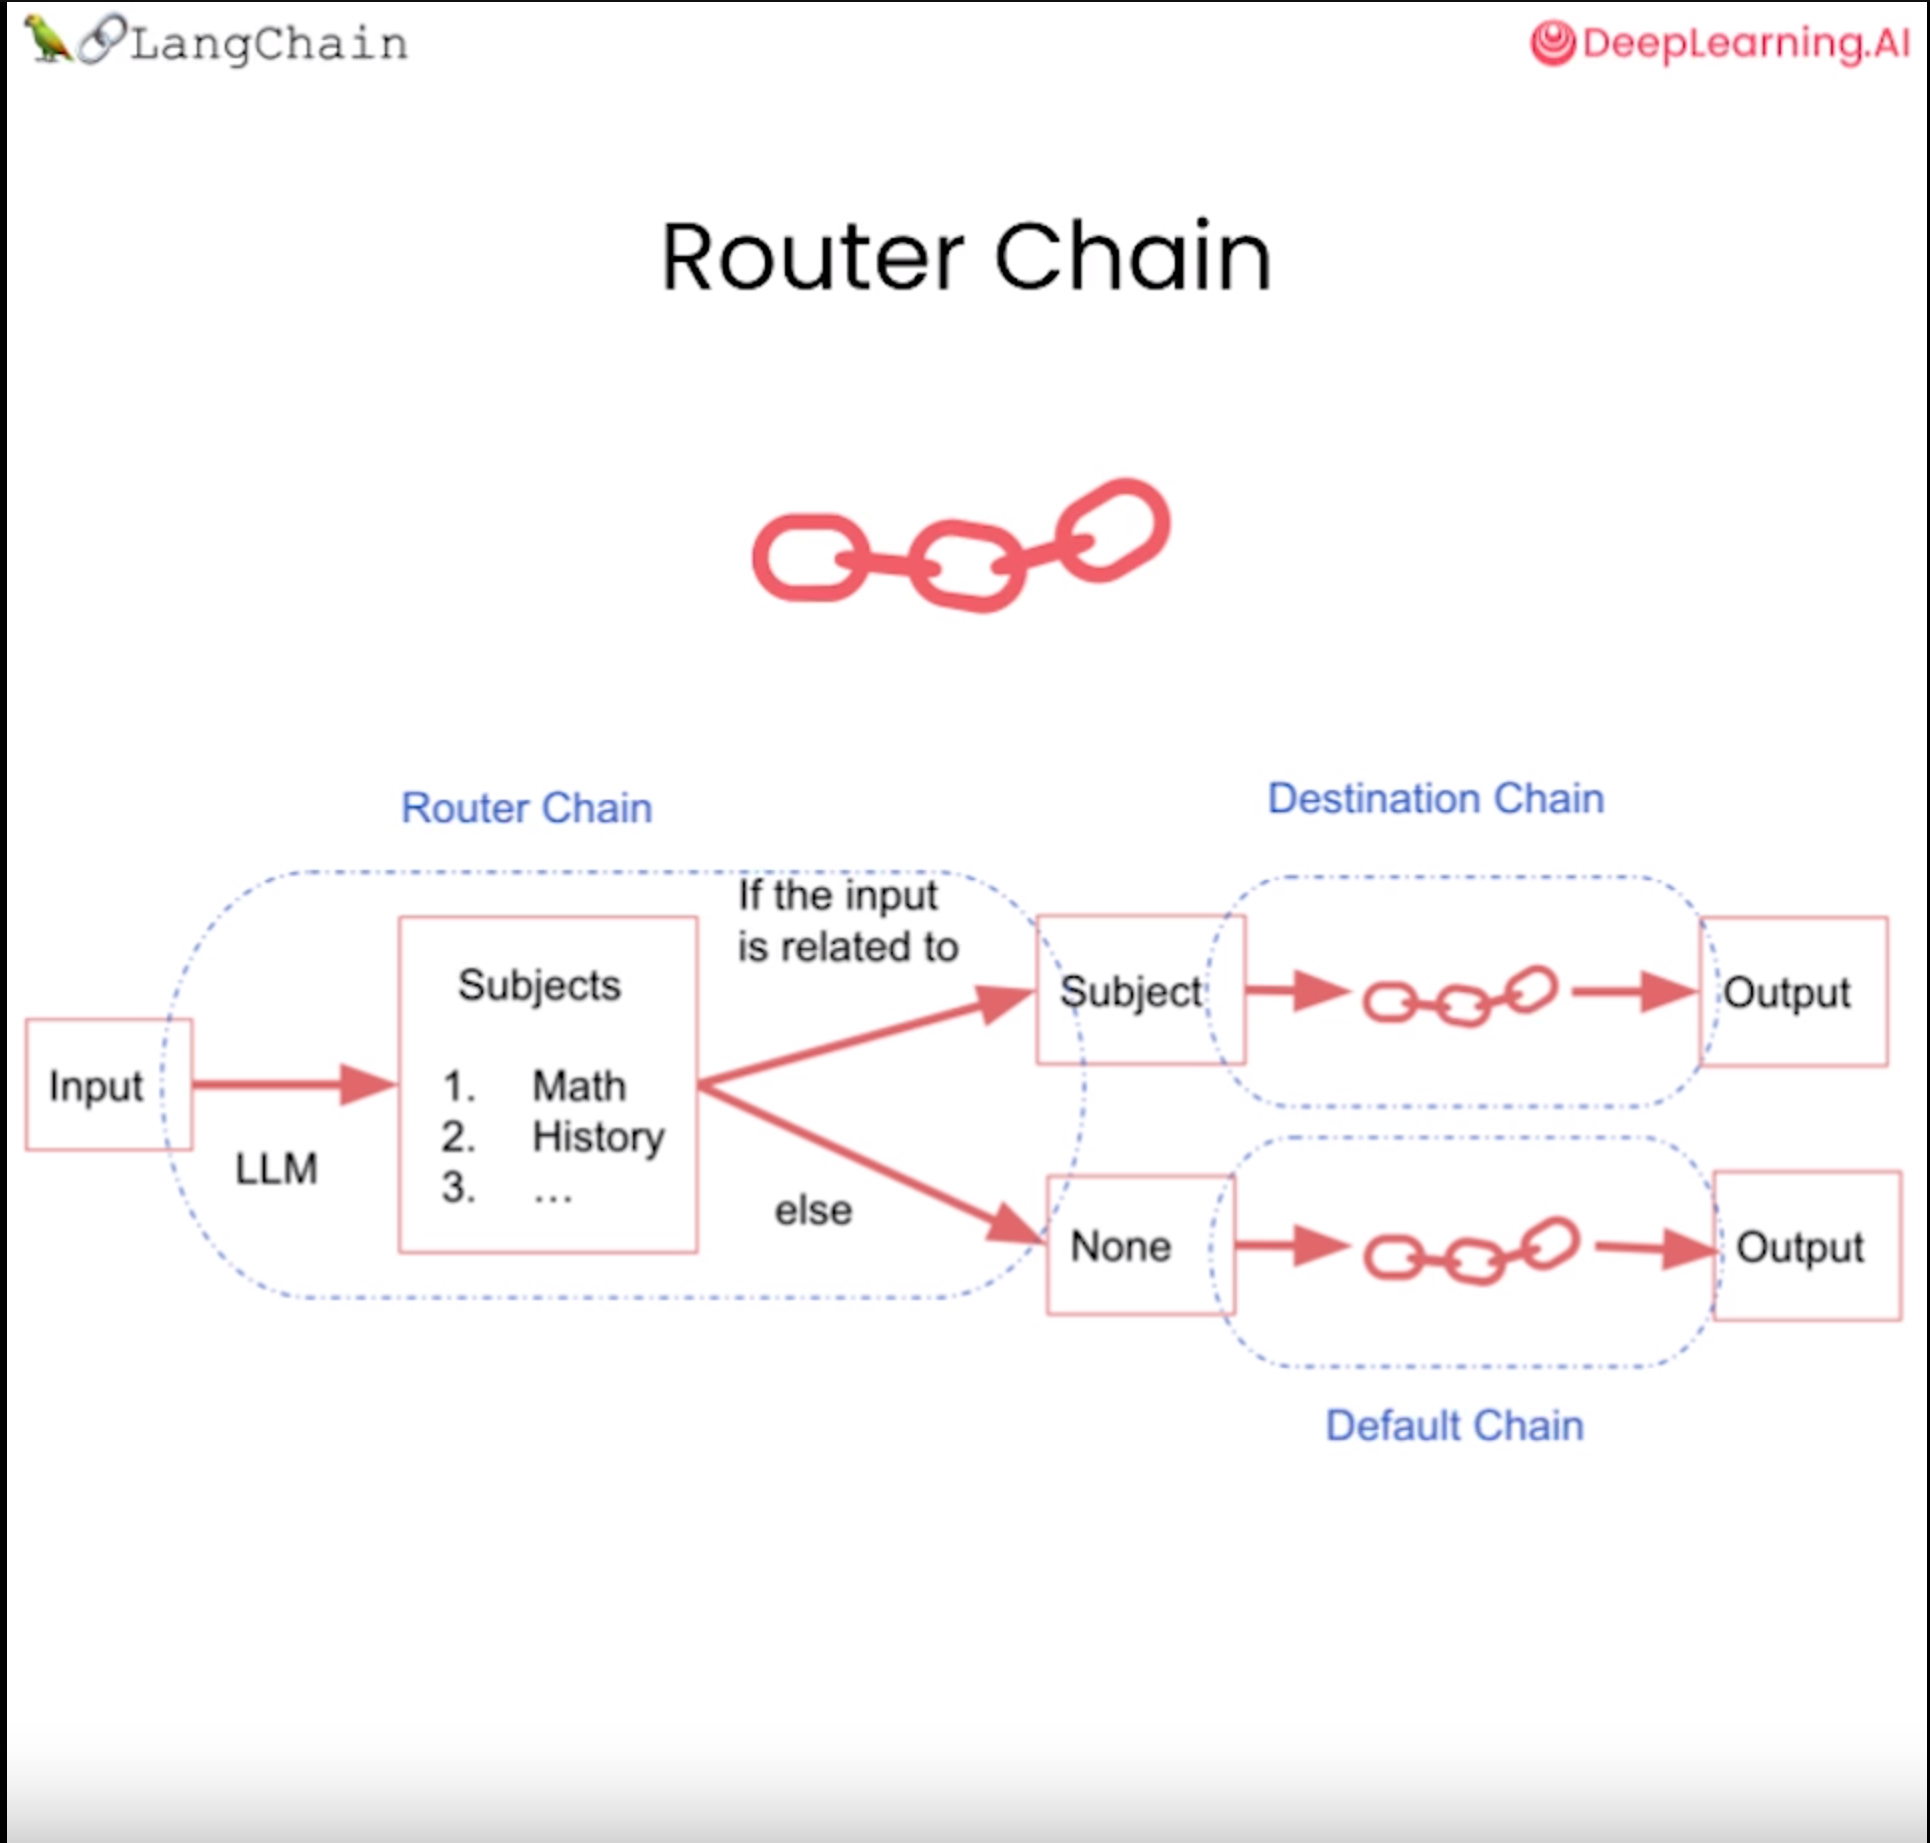

In [25]:
physics_template = """You are a very smart physics professor. \
You are great at answering questions about physics in a concise\
and easy to understand manner. \
When you don't know the answer to a question you admit\
that you don't know.

Here is a question:
{input}"""


math_template = """You are a very good mathematician. \
You are great at answering math questions. \
You are so good because you are able to break down \
hard problems into their component parts,
answer the component parts, and then put them together\
to answer the broader question.

Here is a question:
{input}"""

history_template = """You are a very good historian. \
You have an excellent knowledge of and understanding of people,\
events and contexts from a range of historical periods. \
You have the ability to think, reflect, debate, discuss and \
evaluate the past. You have a respect for historical evidence\
and the ability to make use of it to support your explanations \
and judgements.

Here is a question:
{input}"""


computerscience_template = """ You are a successful computer scientist.\
You have a passion for creativity, collaboration,\
forward-thinking, confidence, strong problem-solving capabilities,\
understanding of theories and algorithms, and excellent communication \
skills. You are great at answering coding questions. \
You are so good because you know how to solve a problem by \
describing the solution in imperative steps \
that a machine can easily interpret and you know how to \
choose a solution that has a good balance between \
time complexity and space complexity.

Here is a question:
{input}"""

In [26]:
prompt_infos = [
    {
        "name": "physics",
        "description": "Good for answering questions about physics",
        "prompt_template": physics_template
    },
    {
        "name": "math",
        "description": "Good for answering math questions",
        "prompt_template": math_template
    },
    {
        "name": "History",
        "description": "Good for answering history questions",
        "prompt_template": history_template
    },
    {
        "name": "computer science",
        "description": "Good for answering computer science questions",
        "prompt_template": computerscience_template
    }
]

In [27]:
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain,RouterOutputParser
from langchain.prompts import PromptTemplate

In [28]:
llm = ChatOpenAI(temperature=0)

In [29]:

destination_chains = {}
for p_info in prompt_infos:
    name = p_info["name"]
    prompt_template = p_info["prompt_template"]
    prompt = ChatPromptTemplate.from_template(template=prompt_template)
    chain = LLMChain(llm=llm, prompt=prompt)
    destination_chains[name] = chain

destinations = [f"{p['name']}: {p['description']}" for p in prompt_infos]
destinations_str = "\n".join(destinations)

In [30]:
default_prompt = ChatPromptTemplate.from_template("{input}")
default_chain = LLMChain(llm=llm, prompt=default_prompt)

In [31]:
MULTI_PROMPT_ROUTER_TEMPLATE = """Given a raw text input to a \
language model select the model prompt best suited for the input. \
You will be given the names of the available prompts and a \
description of what the prompt is best suited for. \
You may also revise the original input if you think that revising\
it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{{{
    "destination": string \ name of the prompt to use or "DEFAULT"
    "next_inputs": string \ a potentially modified version of the original input
}}}}
```

REMEMBER: "destination" MUST be one of the candidate prompt \
names specified below OR it can be "DEFAULT" if the input is not\
well suited for any of the candidate prompts.
REMEMBER: "next_inputs" can just be the original input \
if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
{destinations}

<< INPUT >>
{{input}}

<< OUTPUT (remember to include the ```json)>>"""

In [32]:
router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(
    destinations=destinations_str
)
router_prompt = PromptTemplate(
    template=router_template,
    input_variables=["input"],
    output_parser=RouterOutputParser(),
)

router_chain = LLMRouterChain.from_llm(llm, router_prompt)

In [33]:
chain = MultiPromptChain(router_chain=router_chain,
                         destination_chains=destination_chains,
                         default_chain=default_chain, verbose=True
                        )

In [34]:
chain.run("What is black body radiation?")



> Entering new  chain...
physics: {'input': 'What is black body radiation?'}
> Finished chain.


"Black body radiation refers to the electromagnetic radiation emitted by a perfect black body, which is an object that absorbs all radiation that falls on it and emits radiation at all wavelengths. The radiation emitted by a black body depends only on its temperature and follows a specific distribution known as Planck's law. This type of radiation is important in understanding the behavior of stars, as well as in the development of technologies such as incandescent light bulbs and infrared cameras."

In [35]:
chain.run("what is 2 + 2")



> Entering new  chain...
math: {'input': 'what is 2 + 2'}
> Finished chain.


'As an AI language model, I can answer this question easily. The answer to 2 + 2 is 4.'

In [36]:
chain.run("Why does every cell in our body contain DNA?")



> Entering new  chain...
None: {'input': 'Why does every cell in our body contain DNA?'}
> Finished chain.


'Every cell in our body contains DNA because DNA carries the genetic information that determines the characteristics and functions of each cell. DNA contains the instructions for the synthesis of proteins, which are essential for the structure and function of cells. Additionally, DNA is responsible for the transmission of genetic information from one generation to the next. Therefore, every cell in our body needs DNA to carry out its specific functions and to maintain the integrity of the organism as a whole.'